# Make global data available as pandas data frame

We use data from the files at https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_time_series

Thank you @CSSEGISandData for providing the data!

In [1]:
%config InlineBackend.figure_formats = ['svg']
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
figsize = (8, 6)   # need bigger size otherwise xlabels are cut-off in svg files

In [2]:
import os
import pandas as pd
import seaborn as sb
sb.set_style('darkgrid')
import scipy
import numpy as np

base_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/"

def string_to_date(input_):
    """Converts string of type 01/22/02 [for 22 Jan 2020] into datetime object"""
    # return pd.to_datetime(input_, format='%m/%d/%y', errors='ignore')
    return pd.to_datetime(input_, format='%m/%d/%y')


def set_date_formatting(ax):
    ax.xaxis.set_major_locator(matplotlib.dates.DayLocator())
    ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%b %d'))
    ax.tick_params(axis='x', rotation=90)

# read data from web
#
def fetch_data(names = ['Confirmed', 'Deaths', 'Recovered']):
    """Return 4 data frames:
    [confirmed, deaths, recovered], location_info
    
    where confirmed, deaths and recovered are data frames with countries/regions in the rows, and 
    days in the columns
    
    and location_info provides additional information about the locations.
    
    We assume all three tables have the same entries"""
    location_info = pd.DataFrame()
    dfs = []
    for name in names:
        url = os.path.join(base_url, "time_series_19-covid-" + name + ".csv")
        df = pd.read_csv(url, index_col=1)
    
        if not name == 'Recovered':
            location_info['Lat'] = df['Lat']
            location_info['Long'] = df['Long']
            location_info['Province/State'] = df['Province/State']
            location_info['location'] = df.index + "-" + df['Province/State']
        else:
            pass  # no location info in recovered since 14 March
        ## df = df.drop(labels=["Lat", "Long", "Province/State"], axis=1)
        df = df.drop(labels=["Lat", "Long"], axis=1)
        
        # extract dates from strings
        dates = string_to_date(df.columns[1:])        
        # use those objects as new column labels
        df.columns = [df.columns[0]] + list(dates)
        print(f"{name:10}: last data point from {max(dates[1:])}")
        # dfs.append([df, location_info)
        dfs.append(df)

    return dfs



In [3]:
# (confirmed, deaths, recovered), location_infos = fetch_data()
confirmed, deaths, recovered = fetch_data()

Confirmed : last data point from 2020-03-22 00:00:00
Deaths    : last data point from 2020-03-22 00:00:00
Recovered : last data point from 2020-03-22 00:00:00


In [4]:
# show counries with mosth deaths
deaths.sort_values(by=deaths.columns[-1], ascending=False).iloc[0:10,-8:]

,2020-03-15 00:00:00,2020-03-16 00:00:00,2020-03-17 00:00:00,2020-03-18 00:00:00,2020-03-19 00:00:00,2020-03-20 00:00:00,2020-03-21 00:00:00,2020-03-22 00:00:00
Country/Region,,,,,,,,
Italy,1809,2158,2503,2978,3405,4032,4825,5476
China,3085,3099,3111,3122,3130,3133,3139,3144
Spain,289,342,533,623,830,1043,1375,1772
Iran,724,853,988,1135,1284,1433,1556,1685
France,91,148,148,148,243,450,562,674
United Kingdom,21,55,55,71,137,177,233,281
Netherlands,20,24,43,58,76,106,136,179
US,3,10,13,16,34,42,60,117
"Korea, South",75,75,81,84,91,94,102,104


In [5]:
deaths.describe()

,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,...,2020-03-13,2020-03-14,2020-03-15,2020-03-16,2020-03-17,2020-03-18,2020-03-19,2020-03-20,2020-03-21,2020-03-22
count,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,...,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000
mean,0.034908,0.036961,0.053388,0.086242,0.114990,0.168378,0.268994,0.273101,0.351129,0.437372,...,11.096509,11.948665,13.223819,14.632444,16.232033,17.932238,20.260780,23.201232,26.638604,30.045175
std,0.770344,0.771582,1.089240,1.813517,2.357704,3.445099,5.664808,5.665337,7.341880,9.244712,...,151.905093,156.423240,165.620225,175.901869,187.664763,203.777236,220.529525,245.241488,277.916522,307.811233
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,1.000000,1.000000,1.000000
max,17.000000,17.000000,24.000000,40.000000,52.000000,76.000000,125.000000,125.000000,162.000000,204.000000,...,3062.000000,3075.000000,3085.000000,3099.000000,3111.000000,3122.000000,3405.000000,4032.000000,4825.000000,5476.000000


Available countries:

In [6]:
pd.set_option('display.max_rows', None)

In [7]:
confirmed.sort_values(by=confirmed.columns[-1], ascending=False).iloc[0:10,-8:]

,2020-03-15 00:00:00,2020-03-16 00:00:00,2020-03-17 00:00:00,2020-03-18 00:00:00,2020-03-19 00:00:00,2020-03-20 00:00:00,2020-03-21 00:00:00,2020-03-22 00:00:00
Country/Region,,,,,,,,
China,67794,67798,67799,67800,67800,67800,67800,67800
Italy,24747,27980,31506,35713,41035,47021,53578,59138
Spain,7798,9942,11748,13910,17963,20410,25374,28768
Germany,5795,7272,9257,12327,15320,19848,22213,24873
Iran,13938,14991,16169,17361,18407,19644,20610,21638
France,4499,6633,7652,9043,10871,12612,14282,16018
US,732,967,1706,2495,5365,8310,11710,15793
"Korea, South",8162,8236,8320,8413,8565,8652,8799,8897
Switzerland,2200,2200,2700,3028,4075,5294,6575,7245


In [8]:
recovered.sort_values(by=recovered.columns[-1], ascending=False).iloc[0:10,-8:]

,2020-03-15 00:00:00,2020-03-16 00:00:00,2020-03-17 00:00:00,2020-03-18 00:00:00,2020-03-19 00:00:00,2020-03-20 00:00:00,2020-03-21 00:00:00,2020-03-22 00:00:00
Country/Region,,,,,,,,
China,54288,55142,56003,56927,57682,58382,58946,59433
Iran,4590,4590,5389,5389,5710,6745,7635,7931
Italy,2335,2749,2941,4025,4440,4440,6072,7024
"Korea, South",510,1137,1407,1540,1540,1540,1540,2909
Spain,517,530,1028,1081,1107,1588,2125,2575
France,12,12,12,12,12,12,12,2200
China,1304,1306,1307,1313,1318,1323,1325,1329
China,1250,1250,1250,1250,1250,1250,1250,1250
China,1211,1216,1216,1216,1217,1219,1219,1219


# Pick one country

In [9]:
country = "Germany"
# country = "San Marino"
# country = "United Kingdom"
# country = "Italy"

In [10]:
# create one DataFrame for country/region
c_df = pd.DataFrame()
if country == "United Kingdom":
    # UK has three Provinces: Channel Islands, Gibraltar and UK. Only need last one
    c_df['confirmed'] = confirmed.loc[country].drop('Province/State', axis=1).iloc[2]
    c_df['recovered'] = recovered.loc[country].drop('Province/State', axis=1).iloc[2]
    c_df['deaths'] = deaths.loc[country].drop('Province/State', axis=1).iloc[2]
else:
    c_df['confirmed'] = confirmed.loc[country].drop('Province/State')
    c_df['recovered'] = recovered.loc[country].drop('Province/State')
    c_df['deaths'] = deaths.loc[country].drop('Province/State')

    # Compute those who are infected and have not recovered or died yet and call them 'active'
c_df['active'] = c_df['confirmed'] - c_df['recovered'] - c_df['deaths']
c_df.index = string_to_date(c_df.index)

In [11]:
c_df.country = country  # remember which country we work on, just in case
c_df.tail()

,confirmed,recovered,deaths,active
2020-03-18,12327,105,28,12194
2020-03-19,15320,113,44,15163
2020-03-20,19848,180,67,19601
2020-03-21,22213,233,84,21896
2020-03-22,24873,266,94,24513


In [12]:
## Only cases since 25 Feb, set all values to zero for that day
c2_df = c_df['2020-02-25':] - c_df.loc['2020-02-25']
c2_df

,confirmed,recovered,deaths,active
2020-02-25,0,0,0,0
2020-02-26,10,1,0,9
2020-02-27,29,2,0,27
2020-02-28,31,2,0,29
2020-02-29,62,2,0,60
2020-03-01,113,2,0,111
2020-03-02,142,2,0,140
2020-03-03,179,2,0,177
2020-03-04,245,2,0,243
2020-03-05,465,2,0,463


/Users/fangohr/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


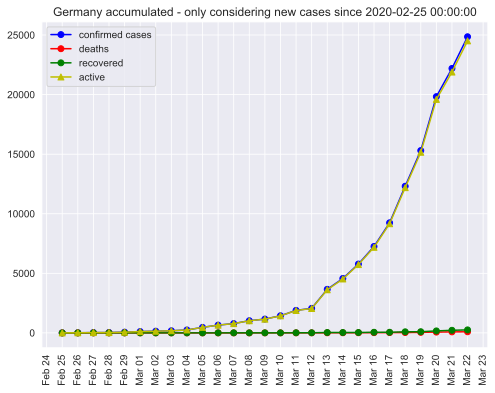

In [13]:
fig, ax = plt.subplots(figsize=figsize)
set_date_formatting(ax)
ax.plot(c2_df.index, c2_df['confirmed'], 'o-b')
ax.plot(c2_df.index, c2_df['deaths'], 'o-r')
ax.plot(c2_df.index, c2_df['recovered'], 'o-g')
ax.plot(c2_df.index, c2_df['active'], '^-y')
ax.legend(['confirmed cases', 'deaths', 'recovered', 'active'])
ax.set_title(country + " accumulated - only considering new cases since " + str(min(c2_df.index)));
fig.savefig("figures/germany-overview-25-feb.svg")

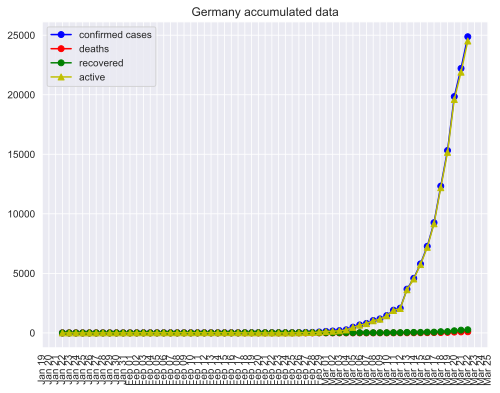

In [14]:
fig, ax = plt.subplots(figsize=figsize)
set_date_formatting(ax)
ax.plot(c_df.index, c_df['confirmed'], 'o-b')
ax.plot(c_df.index, c_df['deaths'], 'o-r')
ax.plot(c_df.index, c_df['recovered'], 'o-g')
ax.plot(c_df.index, c_df['active'], '^-y')
ax.legend(['confirmed cases', 'deaths', 'recovered', 'active'])
ax.set_title(country + " accumulated data")
fig.savefig("figures/germany-overview.svg")

# Compute some derived entities

In [15]:
# Compute day-to-day increases
c_df['new_confirmed'] = c_df['confirmed'].diff()
c_df['new_recovered'] = c_df['recovered'].diff()
c_df['new_deaths'] = c_df['deaths'].diff()
c_df['new_active'] = c_df['active'].diff()
c_df['pct-confirmed'] = c_df['confirmed'].pct_change()
c_df['pct-deaths'] = c_df['deaths'].pct_change()
c_df.tail(20)

,confirmed,recovered,deaths,active,new_confirmed,new_recovered,new_deaths,new_active,pct-confirmed,pct-deaths
2020-03-03,196,16,0,180,37,0,0,37,0.232704,NaN
2020-03-04,262,16,0,246,66,0,0,66,0.336735,NaN
2020-03-05,482,16,0,466,220,0,0,220,0.839695,NaN
2020-03-06,670,17,0,653,188,1,0,187,0.390041,NaN
2020-03-07,799,18,0,781,129,1,0,128,0.192537,NaN
2020-03-08,1040,18,0,1022,241,0,0,241,0.301627,NaN
2020-03-09,1176,18,2,1156,136,0,2,134,0.130769,inf
2020-03-10,1457,18,2,1437,281,0,0,281,0.238946,0.000000
2020-03-11,1908,25,3,1880,451,7,1,443,0.309540,0.500000
2020-03-12,2078,25,3,2050,170,0,0,170,0.089099,0.000000


In [16]:
c2_df['days-td'] = c2_df.index - c2_df.index.min()  # days as TimeDelta type
c2_df['days'] = c2_df['days-td'].astype("timedelta64[D]").astype(float)

In [17]:
c2_df

,confirmed,recovered,deaths,active,days-td,days
2020-02-25,0,0,0,0,0 days,0.0
2020-02-26,10,1,0,9,1 days,1.0
2020-02-27,29,2,0,27,2 days,2.0
2020-02-28,31,2,0,29,3 days,3.0
2020-02-29,62,2,0,60,4 days,4.0
2020-03-01,113,2,0,111,5 days,5.0
2020-03-02,142,2,0,140,6 days,6.0
2020-03-03,179,2,0,177,7 days,7.0
2020-03-04,245,2,0,243,8 days,8.0
2020-03-05,465,2,0,463,9 days,9.0


In [18]:
def model_par(t0=None, p=None, c=None, a0=None):
    """Just to order parameters into tuple for curve_fit call"""
    return t0, p, c, a0

def model(t, t0, p, c, a0):
    """Simple model"""
    
    return c*(t-t0)**p + a0 

def pretty_params(param, end="\n"):
    t0, p, c, a0 = param
    s = "p = {:.3f}".format(p) + end
    s += "c = {:.3g}".format(c) + end
    s += "t0= {:.3f}".format(t0) + end
    s += "a0= {:.3f}".format(a0)
    return s

def day_to_date(day, day0=pd.datetime(year=2020, month=1, day=21)):
    """Given the day from day0 (21 Jan 2020), return the data as a string.
    Example output: '26 Jan 2020'
    
    Needed to obtain days for predictions into the future, which are not given in our data frame 'data' yet.
    """
    assert isinstance(day, (int, float)), day
    
    # Compute date
    date = day0 + pd.Timedelta(day, "D")
    # format nicely
    s = date.strftime("%d %b %Y")
    return s

In [19]:
# deselect data points if necessary to find working fit parameters
# tmp = c2_df.drop(c2_df.index[17]).drop(c2_df.index[16])
# tmp = c2_df.drop(c2_df.index[17])
tmp = c2_df

In [20]:
p0 = model_par(t0=0, p=2.7, c=1.4, a0=5)   # guess initial values for fit parameters, doesn't work 13 March
p0 = model_par(t0=0, p=2, c=1.4, a0=5)   # guess initial values for fit parameters
p0 = model_par(t0=0, p=4, c=0.02, a0=5)   # guess initial values for fit parameters


days = tmp['days']
infections = tmp['confirmed']

param_infections, cov_infections = \
    scipy.optimize.curve_fit(model, days, 
                             infections, 
                             p0=p0)

In [21]:
#param_infections = p0   # use to debug if p0 was not good guess
t0, p, c, a0 = param_infections


fitted_infections = model(c2_df['days'], t0, p, c, a0)
print(pretty_params(param_infections))

p = 4.187
c = 0.0304
t0= -0.000
a0= -223.770


In [22]:
# Estimated standard deviation of parameters
print("Uncertainties for fit parameters:")
with np.printoptions(precision=2, suppress=True):
    print(pretty_params(np.sqrt(cov_infections.diagonal())))

Uncertainties for fit parameters:
p = 0.394
c = 0.0449
t0= 1.779
a0= 203.332


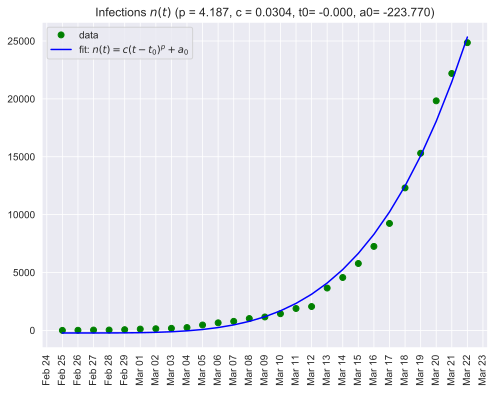

In [23]:
c2_df['date'] = c2_df.index
fig, ax = plt.subplots(figsize=figsize)
ax.plot(c2_df['date'], c2_df['confirmed'], 'og')
ax.plot(c2_df['date'], fitted_infections, '-b')
ax.legend(["data", "fit: $n(t) = c(t-t_0)^p+a_0$"])
ax.set_title(f"Infections $n(t)$ ({pretty_params(param_infections, end=', ')})")
ax.xaxis.set_major_locator(matplotlib.dates.DayLocator())
ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%b %d'))
ax.tick_params(axis='x', rotation=90)
fig.savefig('figures/infections-with-model-fit.svg')

In [24]:
# write model parameters to file
parameter_file = f"figures/{country}-model-parameters.txt"
# create empty file if it doesn't exist
open(parameter_file, 'at').close()
t0, p, c, a0 = param_infections
fitted_infections = model(days, t0, p, c, a0)
# check if we have entry for this date
date = max(c2_df.index).date().isoformat()
# have we written data based on 'date' to the file already?
if date in open(parameter_file, "r").read():
    print(f"Already entry for {date} in {parameter_file}")
else:
    with open(parameter_file, "ta") as f:
        s = f"{date}: {pretty_params(param_infections, end=', ')}"
        print(s)
        f.write(s + "\n")

2020-03-22: p = 4.187, c = 0.0304, t0= -0.000, a0= -223.770


In [25]:
!cat figures/germany-model-parameters.txt

2020-03-11: p = 2.908, c = 0.661, t0= -0.257, a0= 9.350
2020-03-12: p = 2.711, c = 1.15, t0= -0.000, a0= 3.335
2020-03-13: p = 2.423, c = 3.05, t0= -0.000, a0= -117.677
2020-03-14: p = 2.452, c = 3.22, t0= -0.000, a0= -191.766

2020-03-16: p = 4.157, c = 0.0272, t0= -0.000, a0= 42.739
2020-03-19: p = 4.181, c = 0.0291, t0= -0.000, a0= -111.532
2020-03-21: p = 3.980, c = 0.0582, t0= -0.015, a0= -278.458
2020-03-22: p = 4.187, c = 0.0304, t0= -0.000, a0= -223.770


# Predictions for confirmed cases

In [26]:
with open("figures/germany-predicted-infections.txt", "tw") as f:
    f.write(f"Predictions for cases in {c_df.country}:\n\n")
    f.write(f"Last data point used in prediction from {max(c2_df.index)}\n\n")
    for future_days in range(1, 30):
        d = int(max(c2_df['days'])) + future_days
        f.write(f"Infections in {future_days:2} days: " +
              f"{int(round(model(d, c=c, t0=t0, p=p, a0=a0))):6}" +
              f" ({day_to_date(d, min(c2_df.index))})\n")
        
        
        
    f.write(f"\nFit parameters: {pretty_params(param_infections, end=' ')}")
!cat figures/germany-predicted-infections.txt

Predictions for cases in Germany:

Last data point used in prediction from 2020-03-22 00:00:00

Infections in  1 days:  29717 (23 Mar 2020)
Infections in  2 days:  34642 (24 Mar 2020)
Infections in  3 days:  40160 (25 Mar 2020)
Infections in  4 days:  46320 (26 Mar 2020)
Infections in  5 days:  53170 (27 Mar 2020)
Infections in  6 days:  60762 (28 Mar 2020)
Infections in  7 days:  69149 (29 Mar 2020)
Infections in  8 days:  78386 (30 Mar 2020)
Infections in  9 days:  88532 (31 Mar 2020)
Infections in 10 days:  99644 (01 Apr 2020)
Infections in 11 days: 111785 (02 Apr 2020)
Infections in 12 days: 125018 (03 Apr 2020)
Infections in 13 days: 139409 (04 Apr 2020)
Infections in 14 days: 155025 (05 Apr 2020)
Infections in 15 days: 171937 (06 Apr 2020)
Infections in 16 days: 190216 (07 Apr 2020)
Infections in 17 days: 209935 (08 Apr 2020)
Infections in 18 days: 231172 (09 Apr 2020)
Infections in 19 days: 254005 (10 Apr 2020)
Infections in 20 days: 278513 (11 Apr 2020)
Infections in 21 days: 3

In [27]:
def insert(what, towhere, tag):
    """Insert table into README.md"""
    # backup original
    cmd = f"cp -vf {towhere} tmp-backup.txt"
    os.system(cmd)
    with open(towhere, "tw") as f_out:
        with open("tmp-backup.txt", "tr") as f_in:
            for line in f_in:
                f_out.write(line)
                if tag in line:
                    f_out.write("<pre>\n")
                    with open(what, "rt") as f_table:
                        for line2 in f_table:
                            f_out.write(line2)
                    # end towhere file here
                    f_out.write("</pre>\n")
                    break
                else:
                    pass
    os.system("rm -f tmp-backup.txt")
                    



insert("figures/germany-predicted-infections.txt", "README.md", tag="[comment]: <> insert table here")

## How long does it take for the number of infections to double?

- in the news, we had 6.4 days (with the recent [Lancet paper](https://www.thelancet.com/journals/lancet/article/PIIS0140-6736(20)30260-9/fulltext) given as the reference)

- based on $n(t') =  2n(t)$, we find $$t' = \left((2(t-t_0)^p+\frac{a_0}{c}\right)^\frac{1}{p} + t_0$$

- the time for infections or deaths to double is thus given by $t' - t$, and we can implement the above equation:

In [28]:
# def time_to_double(t, t0, p, a0, c):
def time_to_double(t, c, t0, p, a0):
    tprime = (2*(t - t0)**p + a0/c)**(1/p) + t0
    return tprime - t

In [29]:
day = max(c2_df['days'])
for d in range(3, 30, 2):
    print(f"at day {d:.0f} ({day_to_date(d, min(c2_df.index))}), the time to double n is {time_to_double(d, c, t0, p, a0):.1f} days")

at day 3 (28 Feb 2020), the time to double n is nan days
at day 5 (01 Mar 2020), the time to double n is nan days
at day 7 (03 Mar 2020), the time to double n is nan days
at day 9 (05 Mar 2020), the time to double n is 0.5 days
at day 11 (07 Mar 2020), the time to double n is 1.4 days
at day 13 (09 Mar 2020), the time to double n is 2.0 days
at day 15 (11 Mar 2020), the time to double n is 2.5 days
at day 17 (13 Mar 2020), the time to double n is 2.9 days
at day 19 (15 Mar 2020), the time to double n is 3.3 days
at day 21 (17 Mar 2020), the time to double n is 3.7 days
at day 23 (19 Mar 2020), the time to double n is 4.1 days
at day 25 (21 Mar 2020), the time to double n is 4.5 days
at day 27 (23 Mar 2020), the time to double n is 4.8 days
at day 29 (25 Mar 2020), the time to double n is 5.2 days


/Users/fangohr/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


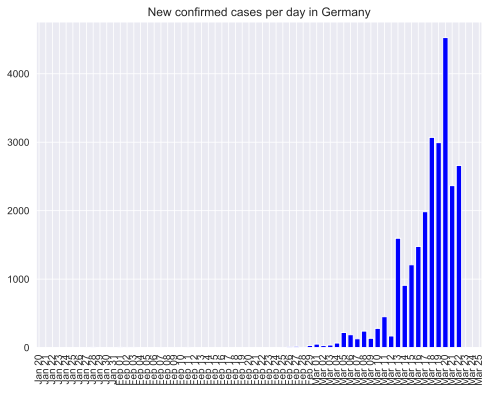

In [30]:
fig, ax = plt.subplots(figsize=figsize)
ax.bar(c_df.index, c_df['new_confirmed'], color='b')
set_date_formatting(ax)
ax.set_title(f"New confirmed cases per day in {c_df.country}")
fig.savefig(f'figures/new-cases-{c_df.country}.svg')

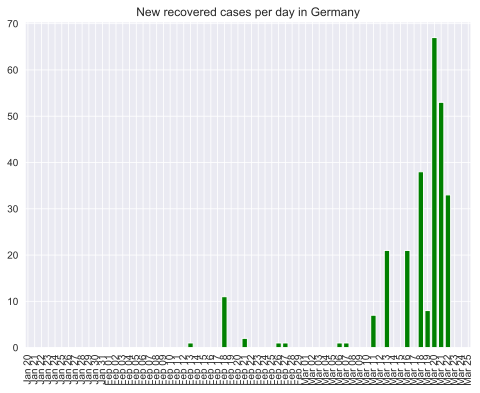

In [31]:
fig, ax = plt.subplots(figsize=figsize)
ax.bar(c_df.index, c_df['new_recovered'], color='g')
set_date_formatting(ax)
ax.set_title(f"New recovered cases per day in {c_df.country}")
fig.savefig(f'figures/new-recovered-{c_df.country}.svg')

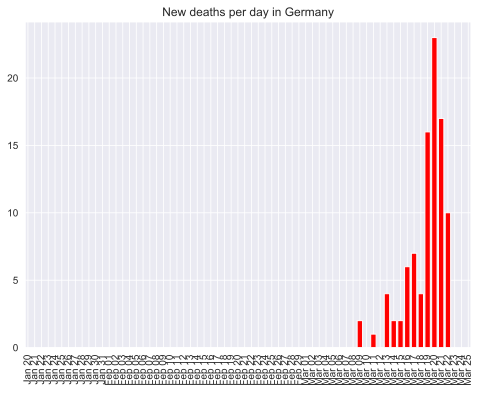

In [32]:
fig, ax = plt.subplots(figsize=figsize)
ax.bar(c_df.index, c_df['new_deaths'], color='r')
set_date_formatting(ax)
ax.set_title(f"New deaths per day in {c_df.country}")
fig.savefig(f'figures/new-deaths-{c_df.country}.svg')

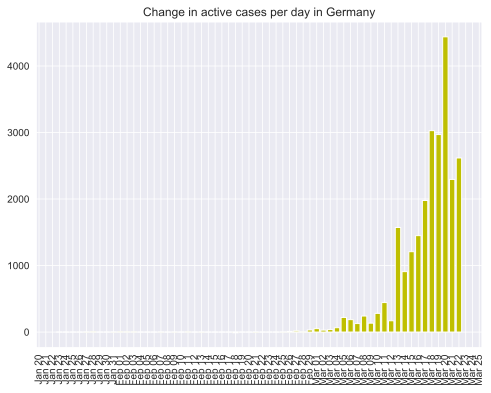

In [33]:
fig, ax = plt.subplots(figsize=figsize)
ax.bar(c_df.index, c_df['new_active'], color='y')
set_date_formatting(ax)
ax.set_title(f"Change in active cases per day in {c_df.country}")
fig.savefig(f'figures/new-active-{c_df.country}.svg')

# Look at some world wide data

In [34]:
# global data
glob = pd.DataFrame()
glob['deaths'] = deaths.sum(axis=0)
glob['confirmed'] = confirmed.sum(axis=0)
glob['recovered'] = recovered.sum(axis=0)
glob['active'] = glob['confirmed'] - glob['deaths'] - glob['recovered']
glob.index = string_to_date(glob.index)

In [35]:
pd.set_option('display.max_columns', 100)
glob

,deaths,confirmed,recovered,active
2020-01-22,17,555,28,510
2020-01-23,18,653,30,605
2020-01-24,26,941,36,879
2020-01-25,42,1434,39,1353
2020-01-26,56,2118,52,2010
2020-01-27,82,2927,61,2784
2020-01-28,131,5578,107,5340
2020-01-29,133,6166,126,5907
2020-01-30,171,8234,143,7920
2020-01-31,213,9927,222,9492


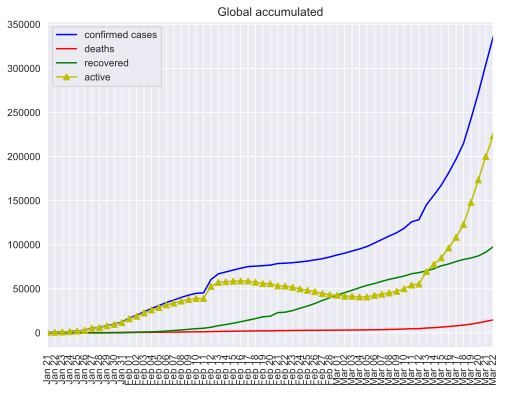

In [36]:
fig, ax = plt.subplots(figsize=figsize)
glob['confirmed'].plot(kind='line', style='-b', ax=ax)
glob['deaths'].plot(kind='line', style='-r', ax=ax)
glob['recovered'].plot(kind='line', style='-g', ax=ax)
glob['active'].plot(kind='line', style='^-y', ax=ax)
set_date_formatting(ax)
ax.legend(['confirmed cases', 'deaths', 'recovered', 'active'])
ax.set_title("Global accumulated");
fig.savefig('figures/global-overview.svg')

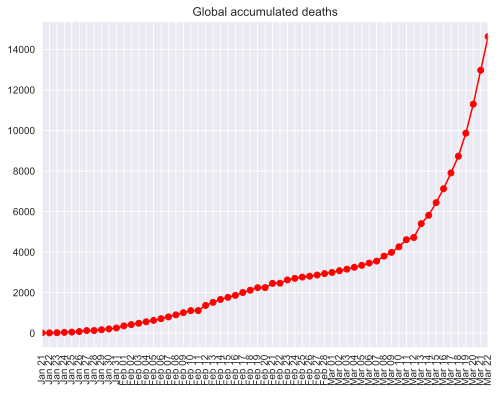

In [37]:
fig, ax = plt.subplots(figsize=figsize)
glob['deaths'].plot(kind='line', style='o-r', ax=ax)
set_date_formatting(ax)
ax.set_title("Global accumulated deaths");
fig.savefig("figures/global-deaths.svg")

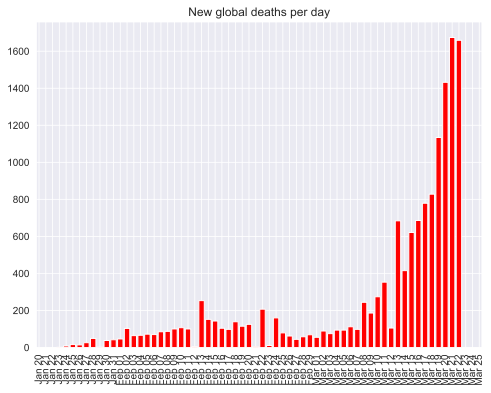

In [38]:
glob['new-deaths'] = glob['deaths'].diff()
glob['new-confirmed'] = glob['confirmed'].diff()

fig, ax = plt.subplots(figsize=figsize)
ax.bar(glob.index, glob['new-deaths'], color='r' )
set_date_formatting(ax)
ax.set_title("New global deaths per day")
fig.savefig('figures/global-new-deaths.svg');

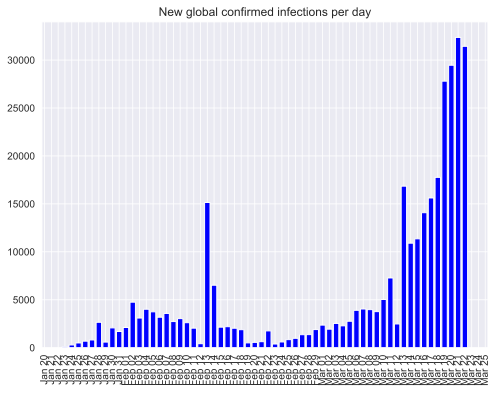

In [39]:
fig, ax = plt.subplots(figsize=figsize)
ax.bar(glob.index, glob['new-confirmed'], color='b')
set_date_formatting(ax)
ax.set_title("New global confirmed infections per day");
fig.savefig('figures/global-new-infections.svg');

# Any common behaviour in growth of infections?

In [40]:
# reduce to only countries with more than ncase cases
ncase = 5000
c3 = confirmed[confirmed.sum(axis=1) > ncase]
c3 = c3.drop('Province/State', axis=1)
print(f"Found {len(c3)} data sets with more than {ncase} infections")

Found 51 data sets with more than 5000 infections


In [41]:

norm = c3.sum(axis=1)

In [42]:
c4 = c3.div(norm, axis='index')
c4 = c3

In [43]:
c4.sum(axis=1)
mainland_china = c4.loc['China'].sum()
c5 = c4.drop('China')  # remove the long list of regions in China
# but add summary for China (sum over all regions, then normalised)
#c5.loc['Mainland China (sum)'] = mainland_china/mainland_china.sum()
c5.loc['China (sum)'] = mainland_china

print(f"{len(c5)} data sets remaining after removing regions in China")

27 data sets remaining after removing regions in China


/Users/fangohr/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [44]:
c5.iloc[:,-10:].sort_values(by=c5.columns[-1], ascending=False)

,2020-03-13 00:00:00,2020-03-14 00:00:00,2020-03-15 00:00:00,2020-03-16 00:00:00,2020-03-17 00:00:00,2020-03-18 00:00:00,2020-03-19 00:00:00,2020-03-20 00:00:00,2020-03-21 00:00:00,2020-03-22 00:00:00
Country/Region,,,,,,,,,,
China (sum),80463,80489,80510,80529,80546,80568,80593,80639,80676,80722
Italy,17660,21157,24747,27980,31506,35713,41035,47021,53578,59138
Spain,5232,6391,7798,9942,11748,13910,17963,20410,25374,28768
Germany,3675,4585,5795,7272,9257,12327,15320,19848,22213,24873
Iran,11364,12729,13938,14991,16169,17361,18407,19644,20610,21638
France,3661,4469,4499,6633,7652,9043,10871,12612,14282,16018
US,421,525,732,967,1706,2495,5365,8310,11710,15793
"Korea, South",7979,8086,8162,8236,8320,8413,8565,8652,8799,8897
Switzerland,1139,1359,2200,2200,2700,3028,4075,5294,6575,7245


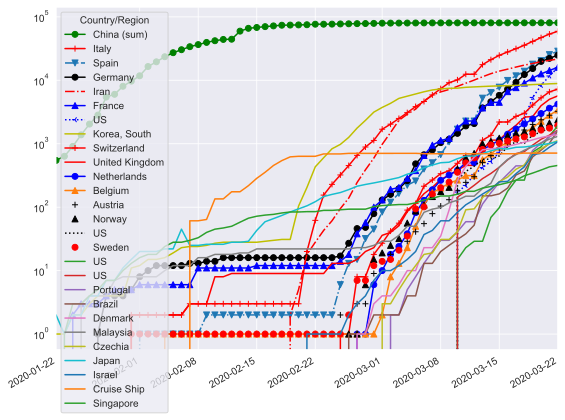

In [45]:
fig, ax = plt.subplots(figsize=(9,7))
styles = ['-og', '+-r', 'v-.', '-ko', '-.r', 'b-^', ':b3', '-y', '-r+', 'r-', '-bo', '^-', 'k+', 'k^', 'k:', 'ro']
c5.sort_values(by=c5.columns[-1], ascending=False).T.plot(ax=ax, style=styles)
ax.set_yscale('log')

# Some countries in Europe


In [46]:
countries = ['Italy', 'France', 'Spain', 'Germany', 'Finland', 'UK', 'Sweden', 'Belgium', 'Croatia', 'Norway', 'Netherlands', 'Iceland']
styles = ['-og', '+-r', 'v-.', '-ok', '-g', 'b-^', ':y', '-y', '-r+', 'g-', '-bo', '^-']
eu_deaths = deaths.loc[countries].T
eu_deaths.drop('Province/State', inplace=True)
eu_cases = confirmed.loc[countries].T
eu_cases.drop('Province/State', inplace=True)

/Users/fangohr/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/fangohr/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  """


In [47]:
eu_deaths.tail()

Country/Region,Italy,France,France,France,France,France,France,France,France,France,Spain,Germany,Finland,UK,Sweden,Belgium,Croatia,Norway,Netherlands,Netherlands,Netherlands,Netherlands,Iceland
2020-03-18 00:00:00,2978,148,0,0,0,0,0,0,0,0,623,28,0,NaN,10,14,0,6,58,0,0,0,1
2020-03-19 00:00:00,3405,243,0,0,0,0,0,0,0,0,830,44,0,NaN,11,21,1,7,76,1,0,0,1
2020-03-20 00:00:00,4032,450,0,0,0,0,0,0,0,0,1043,67,0,NaN,16,37,1,7,106,1,0,0,0
2020-03-21 00:00:00,4825,562,0,0,0,0,0,0,0,0,1375,84,1,NaN,20,67,1,7,136,1,0,0,1
2020-03-22 00:00:00,5476,674,0,0,0,0,0,0,0,0,1772,94,1,NaN,21,75,1,7,179,1,0,0,1


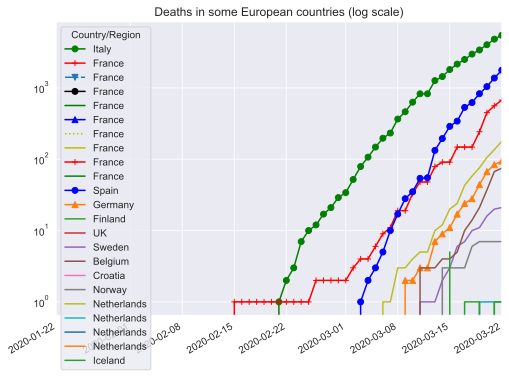

In [48]:
fig, ax = plt.subplots(figsize=figsize)
eu_deaths.plot(kind='line', ax=ax, style=styles)
ax.set_yscale('log')
ax.set_title("Deaths in some European countries (log scale)");

In [49]:
eu_cases.tail()

Country/Region,Italy,France,France,France,France,France,France,France,France,France,Spain,Germany,Finland,UK,Sweden,Belgium,Croatia,Norway,Netherlands,Netherlands,Netherlands,Netherlands,Iceland
2020-03-18 00:00:00,35713,9043,3,3,3,11,3,27,12,0,13910,12327,336,NaN,1279,1486,81,1550,2051,3,4,0,250
2020-03-19 00:00:00,41035,10871,4,3,6,11,3,33,14,2,17963,15320,400,NaN,1439,1795,105,1746,2460,3,4,0,330
2020-03-20 00:00:00,47021,12612,4,3,11,15,6,45,28,2,20410,19848,450,NaN,1639,2257,128,1914,2994,3,5,1,409
2020-03-21 00:00:00,53578,14282,4,3,15,18,7,53,45,4,25374,22213,523,NaN,1763,2815,206,2118,3631,3,5,1,473
2020-03-22 00:00:00,59138,16018,4,3,15,18,11,56,47,4,28768,24873,626,NaN,1934,3401,254,2383,4204,3,8,1,568


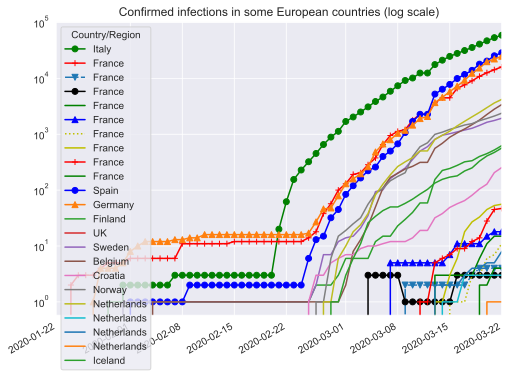

In [50]:
fig, ax = plt.subplots(figsize=figsize)
eu_cases.plot(kind='line', ax=ax, style=styles)
ax.set_yscale('log')
ax.set_title("Confirmed infections in some European countries (log scale)");


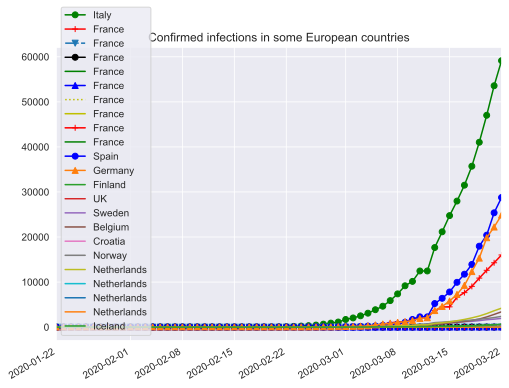

In [51]:
fig, ax = plt.subplots(figsize=figsize)
eu_cases.plot(kind='line', ax=ax, style=styles)
ax.legend(loc="lower left")
ax.set_title("Confirmed infections in some European countries");